# Lecture 5
## Tables and Charts

# Announcements

* Programming Basics session is tonight: materials posted on Piazza
* Lab due Friday, HW due Monday

In [ ]:
from datascience import *
import numpy as np

nba = Table.read_table('nba_salaries.csv') 
nba

# Filtering or Querying

We want to reduce table to only the rows that satisy a certain condition.
 * Keep entries for which it is True.
 * Discard those for which it is False.  
 
The table function `.where()` takes one argument,
 * an array of True/False values,  
 
and keeps only the True rows.

## Example

Get LeBron's row.

## Filtering with Predicates

- A predicate is a function that returns `True` or `False`.
- Apply a predicate to each item in a column.
- Another way of using the `.where()` command is with two arguments:
    * column name
    * predicate
- Applies the predicate to the column and keeps ony `True` rows.
- Many predicates are provided.


In [ ]:
nba.where("'15-'16 SALARY", are.between(10, 20))

## Provided predicates

|Predicate|Description|
|---------|-----------|
|`are.above(y)`|Greater than y|
|`are.above_or_equal_to(y)`|Greater than or equal to y|
|`are.below(y)`|Less than y|
|`are.below_or_equal_to(y)`|Less than or equal to y|
|`are.between(y, z)`|Greater than or equal to y and less than z|
|`are.between_or_equal_to(y, z)`|Greater than or equal to y and less than or equal to z|
|`are.contained_in(list)`|Equal to one of the elements in the given list|
|`are.contained_in(superstring)`|A string that is part of the given superstring|
|`are.containing(substring)`|A string that contains within it the given substring|
|`are.equal_to(y)`|Equal to y|
|`are.not_above(y)`|Is not above |
|`are.not_above_or_equal_to(y)`|Is neither above y nor equal to |
|`are.not_below(y)`|Is not below |
|`are.not_below_or_equal_to(y)`|Is neither below y nor equal to |
|`are.not_between(y, z)`|Is equal to y or less than y or greater than |
|`are.not_between_or_equal_to(y, z)`|Is less than y or greater than |
|`are.not_contained_in(list)`|Not equal to any of the elements in the given list|
|`are.not_contained_in(superstring)`|A string that is not contained within the superstring|
|`are.not_containing(substring)`|A string that does not contain substring|
|`are.not_equal_to(y)`|Is not equal to |
|`are.not_strictly_between(y, z)`|Is equal to y or equal to z or less than y or greater than |
|`are.strictly_between(y, z)`|Greater than y and less than z|

## Example

Get LeBron's row.

`are.equal_to` is the default behavior:

## Example

Grab all of the players from Los Angeles .

## Example

Find all teammates of LeBron James.

In [ ]:
lebron # make table with just LeBron's row
team # extract his team name
# make table with just his teammates

## Example

Find all point guards (PG) or centers (C) who made more than 15 million dollars.


## Predicates are functions!

In [ ]:
# this creates a new function, f
f = are.above(30)

In [ ]:
f(31)

In [ ]:
f(29)

## Looking ahead: creating own predicates

In Python, as in most languages, you can create your own functions.

In [ ]:
#: we can define our own predicates...
def name_is_20_or_more_letters(name):
    return len(name) >= 20

In [ ]:
nba.where('PLAYER', name_is_20_or_more_letters)

<center><img src="summary2.png"  width="800"/></center>

# Practice: Census data

- Every ten years, the U.S. Census Bureau counts the number of people in the U.S.
- On other years, the bureau *estimates* the population
- Data is published online

In [ ]:
census = Table.read_table('census.csv')
census

## Aggregates

In [ ]:
census.where('AGE', 999)

- It looks like `999` means *all ages together*.

## Discussion Question

Based on the output below, what do you think are the meaning of the values in the Sex column?

A.    0 = M, 1 = F, 2= M and F together  
B.    0 = F, 1 = M, 2= M and F together  
C.    0 = M and F together, 1 = M, 2 = F  
D.    0 = M and F together, 1 = F, 2 = M

In [ ]:
census.where('AGE', 85)

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [ ]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [ ]:
# we don't like to type POPESTIMATE2010. Relabel to something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

## Population changes

Compute absolute and percentage changes.

In [ ]:
us_pop = us_pop.with_column(
    'CHANGE',
    us_pop.column('2015') - us_pop.column('2010')
)

In [ ]:
us_pop = us_pop.with_column(
    'PCT CHANGE',
    us_pop.column('CHANGE') / us_pop.column('2010')
    )
us_pop

## Display percentages nicely

In [ ]:
us_pop.set_format('PCT CHANGE', PercentFormatter)

## What age group(s) grew the most in size?

In [ ]:
us_pop.sort('CHANGE', descending=True)

## Why?

In [ ]:
2010 - 68

In [ ]:
2015 - 68

The post-WWII baby boom.

## How does female:male ratio change with age?

General approach:  
1. Keep data for only one year (say, 2015).
2. Make a table of females and a table of males.
3. Divide # of females at each age by # of males at that age.

## 1. Keep data for only 2015

In [ ]:
us_pop_2015 = us_pop.select('SEX', 'AGE', '2015')
us_pop_2015

## 2. Make a table of females and a table of males

In [ ]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

In [ ]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

## 3. Divide # of females at each age by # of males at that age

In [ ]:
# we should "align" the data first to make sure rows are in the same order
females = females.sort('AGE')
males = males.sort('AGE')

In [ ]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    'F:M RATIO', females.column('2015') / males.column('2015')
)
ratios

In [ ]:
ratios.sort('AGE')

In [ ]:
ratios.sort('AGE', descending=True)

## Visualize

In [ ]:
#: a few new imports for displaying nice plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!

In [ ]:
ratios.plot('AGE')

## We've discovered some interesting trends and now can ask why. 

[Why do women live longer than men?](https://ourworldindata.org/why-do-women-live-longer-than-men)

[Why are there more baby boys than baby girls?](https://www.pewresearch.org/fact-tank/2013/09/24/the-odds-that-you-will-give-birth-to-a-boy-or-girl-depend-on-where-in-the-world-you-live/)

## Why visualize?

- Tables can be hard to interpret.
- We hope to spot trends through visualization.
- Many types: scatter plots, line graphs, bar charts, etc.
- The right choice depends on the type of data.

## Some terminology...

- **Individual**: Person/place/thing for which data is recorded.
- **Variable**: Something that is recorded for each individual, a.k.a. a "feature".

Variables can be of different kinds, including:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

## Examples of numerical variables

- Individual is an NBA player, variable is salary
- Individual is a baby, variable is weight in kilograms
- Individual is a place, variable is number of survivors on Napoleon's march

## Examples of categorical variables

- Individual is an NBA player, variable is team name
- Individual is a person in the census, variable is `SEX`
    - Even though represented as 0, 1, 2
- Individual is a Titanic passenger, variable is whether or not they survived

# Scatter plots

## A new dataset: `actors.csv`

|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [ ]:
actors = Table.read_table('actors.csv')
actors

## Scatter plots

- Visualize relationship between two numerical variables
- `.scatter()` method:
    - First argument: column for horizontal axis variable
    - Second argument: column for vertical axis variable
    - Makes one point for each row of the table

## Scatter plots

What is the relationship between `Number of Movies` and `Total Gross`?

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

## Scatter plots

What is the relationship between `Number of Movies` and `Average per Movie`?

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

## Two interesting things...

- A *negative* association.
- An outlier.

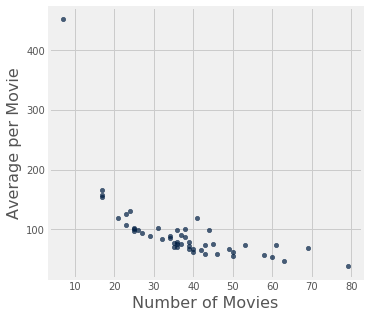


## "Zoom in" to exclude the outlier...

In [ ]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

## Who are these people?

In [ ]:
actors.where('Number of Movies', are.above(60))

## Who is the outlier?

- Made very few, high grossing movies.

In [ ]:
actors.where('Number of Movies', are.below(10))

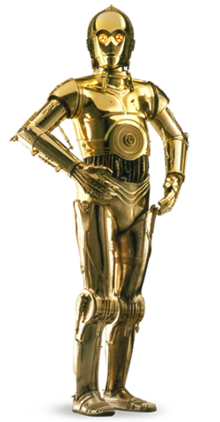

# Line graphs

## More new data: `movies_by_year.csv`

|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

In [ ]:
by_year = Table.read_table('movies_by_year.csv')
by_year

## Line graphs

- Visualize trend (often over time).
- `.plot()` method:
    - First argument: column for horizontal axis.
    - Second argument: column for vertical axis.

## Line graphs

In [ ]:
# how has # of movies changed over time?
by_year.plot('Year', 'Number of Movies')

## Line graphs

In [ ]:
# let's focus on recent years (2000+)
recent = by_year.where('Year', are.above(2000))
recent.plot('Year', 'Number of Movies')

What happened in 2009/2010?

## How did this affect total gross?

In [ ]:
recent.plot('Year', 'Total Gross')

## Trivia: What was the top movie of 2009?

In [ ]:
recent.where('Year', 2009)

# Visualizing categorical distributions

Suppose we have a record of ice cream cones sold:

|Flavor|
|------|
|Vanilla|
Chocolate
Chocolate
Vanilla
Strawberry
Chocolate
Chocolate

We want to visualize the *frequency* of each flavor.

## Categorical *distributions*

We write down the frequency of each flavor in a table:

In [ ]:
flavors = Table().with_columns( 'Flavor', make_array('Vanilla', 'Chocolate', 'Strawberry'), 'Count', make_array(2, 4, 1))
flavors

## Bar charts

In [ ]:
# draw a bar graph
flavors.barh('Flavor')

## Bar charts

- Unlike scatter/line graphs:
    - Height (vertical size) and spacing of bars is arbitrary.
    - Only one numerical variable (horizontal axis)
    - Order of vertical labels doesn't matter

## A (slightly) nicer visualization...

In [ ]:
# sort the columns before plotting
flavors.sort('Count', descending=True).barh('Flavor') 

## Yet another new data set: `top_movies.csv`

In [ ]:
#: read in the csv
top_movies = Table.read_table('top_movies.csv')
top_movies

## What is the distribution of studios?

- That is, what is the count of each?
- `.group()` method:
    - First argument: column to group by
    - Counts members in group by default

## Counting movies by studio

In [ ]:
by_studio = top_movies.group('Studio')
by_studio

## Visualize with a bar chart

In [ ]:
by_studio.sort('count', descending=True).barh('Studio')

## Discussion question

Suppose we run the code below. What do we get?


- A) A bar for each movie. Its length is the age of the movie.
- B) A bar for each age. Its length is the number of movies of that age.
- C) A bar for each year. Its length is the age of movies made that year.

In [ ]:
aged = top_movies.with_column("Age", 2019 - top_movies.column('Year'))
aged.group('Age').barh('Age')

## By the way...

- Used for more than just categorical distributions
- Example: how much did each movie make?

In [ ]:
top_movies.take(np.arange(5)).barh('Title', 'Gross')

## Distribution of top movies by year

Some years have multiple top movies:

In [ ]:
top_movies.where('Year', 2010)

## Count of top movies by year

In [ ]:
top_movies.group('Year')#.barh('Year')

## Observations...

- The bar chart doesn't "space" the years. It treats years as categories.
    - For example, there is no gap between 1921 and 1937.
- It doesn't make sense for us to sort by the length of the bars. We want years in chronological order.

In [ ]:
#: top movies before 1945
top_movies.where('Year', are.below(1945)).group('Year').barh('Year')

## Is `Year` a categorical or numerical variable?

- Categorical: we can group by it.
- Numerical: we sometimes do arithmetic, and there's a natural order.

# Overlaying plots

### Recall the female:male plot from the census
* There are *many* more women than men in old-age!

In [ ]:
ratios.plot('AGE')

### What about absolute numbers?
* Make a new table with columns: `age`, `male population`, `female population`

In [ ]:
Table().with_columns(
    ('age', males.column('AGE')),
    ('male', males.column('2015')),
    ('female', females.column('2015'))
)#.plot('age')

### To plot multiple line graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis in the `.plot(col)` method.
* `plot` will plot **all** other columns on a shared y-axis.

### Plot the overall population by age for both 2010 and 2015
* Use both sexes
* Don't forget `AGE=999`!

In [ ]:
# plot overall population by age for both 2010 and 2015
census = (
    Table
    .read_table('./census.csv')
    .relabeled('POPESTIMATE2010', '2010')
    .relabeled('POPESTIMATE2015', '2015')
    .select('SEX', 'AGE', '2010', '2015')
)
census.where('SEX', 0).drop('SEX').where('AGE', are.below(100)).plot('AGE')

## Bar graphs work similarly

* Drop all extraneous columns from your table.
* Specify the column for the categories in the `.barh(col)` method.
* `barh` will plot bars for each column.

In [ ]:
# plot 2010/2015 totals by SEX
census.where('AGE', 999).drop('AGE').barh('SEX')